

*   **CK+ Dataset images** 
 *   0 = 'anger', 1 = 'contempt',  2 = 'disgust',    3 = 'fear',    4 = 'happy',    5 = 'sadness',    6 = 'surprise'


# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Emotion
!ls

/content/drive/My Drive/Emotion
input  output


# Import Libraties/ Functions

In [3]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

# Import Dataset

In [4]:
dataset_folder='./input/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['fear', 'sadness', 'happy', 'anger', 'disgust', 'surprise', 'contempt']

In [5]:

i=0
last=[]
images=[]
labels=[]
temp = sub_folders
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # positive:0, negative:1, neutral:2 
  if  label in [4, 6]:    # label in ['happy', 'surprise']
    new_label=0           # changed to label = positive emotion
  elif label in [0,5]:      # label in ['anger','sadness']
    new_label=1           # changed to label = negative emotion
  else:                   # label in ['contempt', 'disgust', 'fear']
    new_label=2           # changed to label = neutral emotion
  
  
  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)
  
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

./input/CK+48/fear/S032_004_00000013.png	1
./input/CK+48/fear/S032_004_00000012.png	1
./input/CK+48/fear/S032_004_00000014.png	1
./input/CK+48/fear/S011_003_00000012.png	1
./input/CK+48/fear/S011_003_00000014.png	1
./input/CK+48/fear/S011_003_00000013.png	1
./input/CK+48/fear/S046_003_00000016.png	1
./input/CK+48/fear/S054_002_00000013.png	1
./input/CK+48/fear/S050_001_00000015.png	1
./input/CK+48/fear/S054_002_00000014.png	1
./input/CK+48/fear/S046_003_00000014.png	1
./input/CK+48/fear/S050_001_00000016.png	1
./input/CK+48/fear/S050_001_00000017.png	1
./input/CK+48/fear/S046_003_00000015.png	1
./input/CK+48/fear/S059_002_00000016.png	1
./input/CK+48/fear/S055_006_00000007.png	1
./input/CK+48/fear/S055_006_00000006.png	1
./input/CK+48/fear/S054_002_00000015.png	1
./input/CK+48/fear/S055_006_00000008.png	1
./input/CK+48/fear/S059_002_00000017.png	1
./input/CK+48/fear/S059_002_00000015.png	1
./input/CK+48/fear/S068_004_00000009.png	1
./input/CK+48/fear/S062_001_00000017.png	1
./input/CK+

In [6]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

In [7]:
images_x.shape

(981, 48, 48)

In [8]:
# encoding the labels
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

# Split into Train / Test

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [10]:
len(X_train)

735

In [11]:
len(X_test)

246

# Define CNN Architecture

In [12]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1)

In [13]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

# Model Training

In [14]:
fle_s='./output/emotion_model_new.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [15]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 1.3007 - accuracy: 0.4299
Epoch 1: loss improved from inf to 1.30068, saving model to ./output/emotion_model_new.h5
23/23 [==============================] - 12s 47ms/step - loss: 1.3007 - accuracy: 0.4299 - val_loss: 1.2214 - val_accuracy: 0.4431
Epoch 2/50
17/23 [=====================>........] - ETA: 0s - loss: 1.1785 - accuracy: 0.4430
Epoch 2: loss improved from 1.30068 to 1.17902, saving model to ./output/emotion_model_new.h5
23/23 [==============================] - 0s 14ms/step - loss: 1.1790 - accuracy: 0.4558 - val_loss: 1.1542 - val_accuracy: 0.5610
Epoch 3/50
16/23 [===================>..........] - ETA: 0s - loss: 1.0137 - accuracy: 0.6113
Epoch 3: loss improved from 1.17902 to 0.95128, saving model to ./output/emotion_model_new.h5
23/23 [==============================] - 0s 13ms/step - loss: 0.9513 - accuracy: 0.6340 - val_loss: 0.8989 - val_accuracy: 0.5935
Epoch 4/50
17/23 [=====================>........]

# Model Performance

In [16]:
# lưu các giá trị khi train

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

In [17]:
import numpy as np
train_loss_mean = np.mean(train_loss)
test_loss_mean = np.mean(test_loss)
train_accuracy_mean = np.mean(train_accuracy)
test_accuracy_mean = np.mean(test_accuracy)
print(train_loss_mean)
print(test_loss_mean)
print(train_accuracy_mean)
print(test_accuracy_mean)

0.23269927471876145
0.32111576437950134
0.9355374181270599
0.9143902456760407


Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

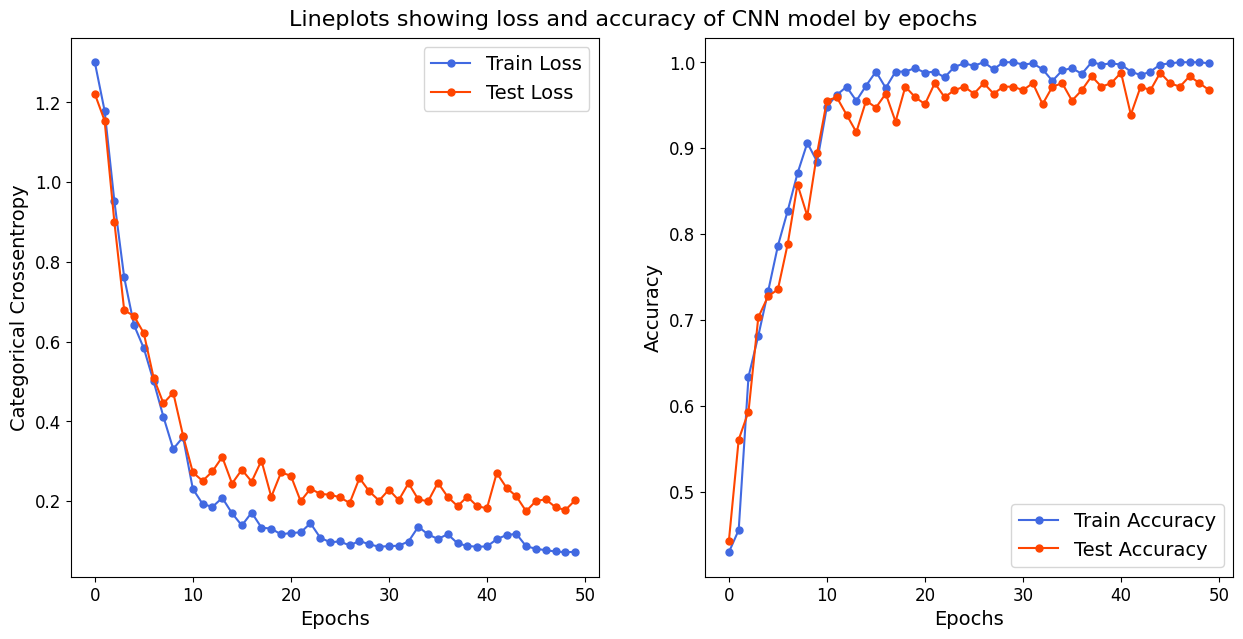

In [18]:

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)